# OneStopEnglish: Data Clearning and EDA
This script imports the One Stop English corpus, which consists of leveled text entries (beginner, intermediate, advanced) aligned to the same topic. Several features of the text entries are calculated using the `textstat` package so that these features can be incoporated in a machine learning classification model to predict text complexity. Two data sets are prepared:
1. A one column CSV file containing only text entries to be used to train NLP models.
1. A dataframe containing numerical characteristics about text entries to be used in training ML models to evaluate text complexity.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import spacy
import nltk
import re
import textstat
import os
from os import listdir
from os.path import join, isfile
import chardet

In [132]:
# Function splits text, t, into sentences
def sent_break(t):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(t)
    return doc.sents

# Function counts the number of words in text t
def word_count(t):
    sents = sent_break(t)
    n_words = 0
    for s in sents:
        n_words += len([token for token in s])
    return n_words

# Function counts the number of sentences in text t
def sent_count(t):
    sents = sent_break(t)
    return len(list(sents))

In [135]:
text = TextDF['text'][1]
# for s in sent_break(text):
#     s = re.sub(r'[^a-zA-Z\s]', '', str(s))
#     print(s)
np.abs(word_count(text) - textstat.lexicon_count(text))

126

In [117]:
text = re.sub(r'[^a-zA-Z\s]', '', text)

653

In [3]:
# Sets option to display all text in pandas dataframes
pd.set_option('display.max_colwidth', None)

In [27]:
# Get file path for OneStopEnglish Corpus from individual TXT files.
FilePath = os.getcwd() + '/OneStopEng/TextByReadingLevel/'

# For some reason there are two "Int" files--do not import the first, as there 
SubDir = [join(FilePath, f)+'/' for f in listdir(FilePath) if f != 'Int-Txt']

# Load all texts into pandas data frame
TextDF = pd.DataFrame()

for s in SubDir:

    TextFiles = listdir(s)

    for t in TextFiles:
        # There is a hidden .ds_store file that should be skipped when importing data
        if t == '.DS_Store':
            pass
        else:
            with open(s + t, 'rb') as rawdat:
                result = chardet.detect(rawdat.read(10000))

                
            file = open(s + t, 'r', encoding = result['encoding'])
            text = file.read()
            file.close()

            # Append text data and file name to dataframe
            TextDF = TextDF.append({'file_nm' : t,
                                    'text' : text},
                                   ignore_index = True)

In [28]:
# Export all texts to csv file for analysis in SimpleGPT2, need to specify encoding or odd figures show
# Column must be included for file to successfully be read into SimpleGPT2
TextDF['text'] = TextDF['text'].apply(str)
TextDF['text'].to_csv('OSE_OnlyTexts.csv', encoding = 'utf-8-sig', index = False)

In [29]:
# Isolate name and level of text
TextDF['name'] = TextDF['file_nm'].str[:-8]
TextDF['level'] = TextDF['file_nm'].str[-7:-4]
TextDF['text'] = TextDF['text'].apply(str)

TextDF.groupby(['level'])['text'].count()

# Intermediate text is labeled--this should be removed
# TextDF['text'] = TextDF['text'].map(lambda x: x.lstrip('Intermediate'))
# TextDF['text'] = TextDF['text'].str.replace('\n', ' ')

level
adv    189
ele    189
int    189
Name: text, dtype: int64

In [30]:
# Clean text (text_c) by lowering, removing numbers, removing symbols, and reducing to single space
TextDF['text_c'] = TextDF['text'].str.lower().str.replace(r'[^a-zA-Z\s]', '')
TextDF['text_c'] = TextDF['text_c'].str.replace(r'\n', ' ').str.replace(r'\s+\s', ' ')

In [57]:
# Compute text difficulty using textstat
TextDF['difficulty'] = TextDF['text'].apply(textstat.flesch_reading_ease)

# Compute different statistics for text entries
TextDF['n_sent'] = TextDF['text'].apply(sent_count)
TextDF['n_syll'] = TextDF['text'].apply(textstat.syllable_count)
TextDF['n_lex'] = TextDF['text'].apply(textstat.lexicon_count)
TextDF['lex_sent'] = TextDF['n_lex']/TextDF['n_sent']
TextDF['syll_lex'] = TextDF['n_syll']

level
adv    AxesSubplot(0.125,0.125;0.775x0.755)
ele    AxesSubplot(0.125,0.125;0.775x0.755)
int    AxesSubplot(0.125,0.125;0.775x0.755)
Name: n_sent, dtype: object

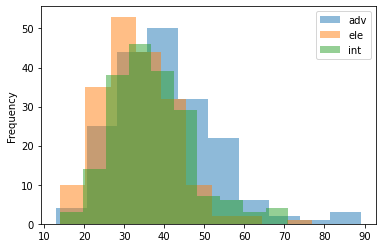

In [58]:
TextDF.groupby('level')['n_sent'].plot(kind = 'hist', legend = True, alpha = 0.5)

level
adv    AxesSubplot(0.125,0.125;0.775x0.755)
ele    AxesSubplot(0.125,0.125;0.775x0.755)
int    AxesSubplot(0.125,0.125;0.775x0.755)
Name: n_syll, dtype: object

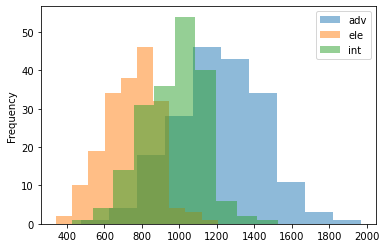

In [59]:
TextDF.groupby('level')['n_syll'].plot(kind = 'hist', legend = True, alpha = 0.5)

level
adv    AxesSubplot(0.125,0.125;0.775x0.755)
ele    AxesSubplot(0.125,0.125;0.775x0.755)
int    AxesSubplot(0.125,0.125;0.775x0.755)
Name: n_lex, dtype: object

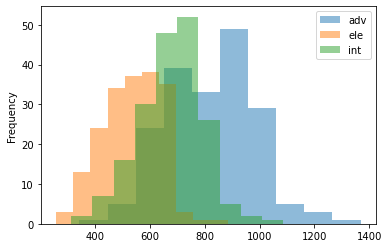

In [60]:
TextDF.groupby('level')['n_lex'].plot(kind = 'hist', legend = True, alpha = 0.5)

level
adv    AxesSubplot(0.125,0.125;0.775x0.755)
ele    AxesSubplot(0.125,0.125;0.775x0.755)
int    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lex_sent, dtype: object

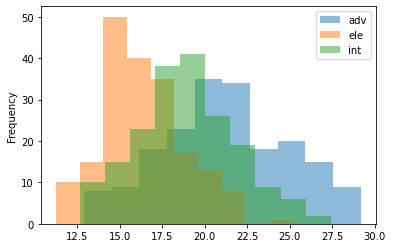

In [61]:
TextDF.groupby('level')['lex_sent'].plot(kind = 'hist', legend = True, alpha = 0.5)

level
adv    AxesSubplot(0.125,0.125;0.775x0.755)
ele    AxesSubplot(0.125,0.125;0.775x0.755)
int    AxesSubplot(0.125,0.125;0.775x0.755)
Name: syll_lex, dtype: object

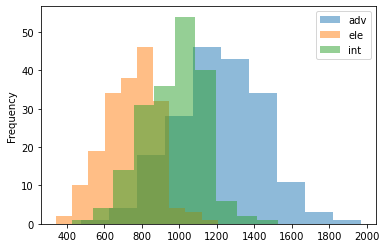

In [62]:
TextDF.groupby('level')['syll_lex'].plot(kind = 'hist', legend = True, alpha = 0.5)

level
adv    AxesSubplot(0.125,0.125;0.775x0.755)
ele    AxesSubplot(0.125,0.125;0.775x0.755)
int    AxesSubplot(0.125,0.125;0.775x0.755)
Name: difficulty, dtype: object

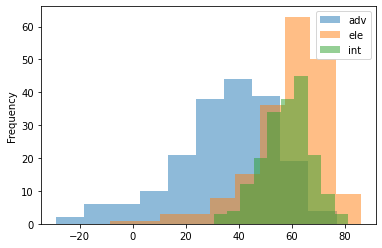

In [63]:
TextDF.groupby('level')['difficulty'].plot(kind = 'hist', legend = True, alpha = 0.5)

# Text Readability Models

In [39]:
# Set seed so results can be reproduced
randomseed = 20200922

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [97]:
# Preprocess data

# Label encoder
le = preprocessing.LabelEncoder()

# Define predictor variables
PredVars = ['difficulty', 'lex_sent', 'syll_lex']

# Subset TextDF to desired variables
MLDat = TextDF[['level']+PredVars].reset_index().drop(columns = ['index'])
MLDat['level'] = le.fit_transform(MLDat['level'])

# Target and predictor variables
y = MLDat['level']
X = MLDat[PredVars]

# Split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = randomseed)

In [98]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, pred, normalize = True)

0.7807017543859649

In [99]:
# Linear support vector classification
svc = LinearSVC(random_state = randomseed)
pred = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, pred, normalize = True)

/anaconda3/envs/InsightDS/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.41228070175438597

In [100]:
# K neighbors classifier
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train, y_train)
pred = knc.predict(X_test)
accuracy_score(y_test, pred, normalize = True)

0.6578947368421053

In [101]:
# Multinomial logistic regression
mlr = LogisticRegression(max_iter = 1500)
pred = mlr.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, pred, normalize = True)

0.7456140350877193

In [ ]:
###################################
# IMPORT DATA STORED IN CSV FILES #
###################################

# Get file path to OneStopEnglish Corpus including combined CSV files.
FilePath = os.getcwd() + '/OneStopEng/TextOneCSVPerFile/'

# Texts are organized by difficulty level
Files = listdir(FilePath)

# Import all texts into pandas dataframe
oseDF = pd.DataFrame() # Initialize dataframe

# Loop through all files
for f in Files:
    
    # Files have different encodings
    # Find the encoding for each file and use that in read_csv command
    with open(FilePath + f, 'rb') as rawdat:
        result = chardet.detect(rawdat.read(10000))
        
    oseDFA = pd.read_csv(FilePath + f, encoding = result['encoding'])
    oseDFA['name'] = f
    
    oseDF = oseDF.append(oseDFA)